# Analizando información de IMDB con Keras

Ya aprendiste cómo se construye una red neuronal. ¡Ahora es tu turno! En este reto, vas a construir una red neuronal que logra predecir si hay un sentimiento positivo o negativo en un review.

In [1]:
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## Paso 1. Cargar la información

In [2]:
# IMDB ya es un dataset que es parte de Keras, así que lo tenemos fácil!
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000,)
(25000,)


In [4]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

## Paso 2. Comprender la información

Esta vez la información ya esta preprocesada, por lo cuál es mucho más fácil trabajar con ella. Todas las palabras han sido transformadas a números, y cada review es un vector con las palabras que contine. El output es el sentimiento, donde 1 es un sentimiento positivo y 0 un sentimiento negativo

In [ ]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## Paso 3. Modificar la información para la red neuronal

### One-hot encoding

Tenemos un vector con números, pero queremos convertirlo en muchos vectores con valor 0 ó 1. Por ejemplo, si el vector preprocesado contiene el número 14, entonces el vector procesado, en la entrada 14, será 1. Haremos lo mismo para la salida. Estamos trabajando con 50mil datos, así que se puede tardar unos segundos.

In [5]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [6]:
# One-hot encoding the output
import tensorflow as tf
from tensorflow.keras.utils import to_categorical 

num_classes = 2
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## Paso 4. Construimos Arquitectura del Modelo

Construye un modelo secuencial. Siéntete libre de explorar y experimentar.

In [7]:
## TODO: Construye un modelo secuencial

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

## TODO: Compila el modelo con un optimizador y una función de pérdida

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               512512    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 513,538
Trainable params: 513,538
Non-trainable params: 0
_________________________________________________________________


## Paso 5. Entrenamos el modelo

In [8]:
## TODO: Corre el modelo. Experimenta con diferentes tamaños de batch y número de epochs. 
# Usa verbose=2 para ver cómo va progresando el modelo
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=25,
          validation_data=(x_test, y_test), 
          verbose=1)


Epoch 1/25
782/782 [==============================] - 7s 6ms/step - loss: 0.5718 - accuracy: 0.6998 - val_loss: 0.4563 - val_accuracy: 0.8050
Epoch 2/25
782/782 [==============================] - 5s 6ms/step - loss: 0.4499 - accuracy: 0.7938 - val_loss: 0.3947 - val_accuracy: 0.8322
Epoch 3/25
782/782 [==============================] - 5s 6ms/step - loss: 0.4060 - accuracy: 0.8196 - val_loss: 0.3707 - val_accuracy: 0.8414
Epoch 4/25
782/782 [==============================] - 5s 7ms/step - loss: 0.3806 - accuracy: 0.8329 - val_loss: 0.3611 - val_accuracy: 0.8459
Epoch 5/25
782/782 [==============================] - 5s 6ms/step - loss: 0.3648 - accuracy: 0.8420 - val_loss: 0.3490 - val_accuracy: 0.8506
Epoch 6/25
782/782 [==============================] - 5s 6ms/step - loss: 0.3502 - accuracy: 0.8475 - val_loss: 0.3406 - val_accuracy: 0.8537
Epoch 7/25
782/782 [==============================] - 5s 7ms/step - loss: 0.3417 - accuracy: 0.8526 - val_loss: 0.3362 - val_accuracy: 0.8562
Epoch 

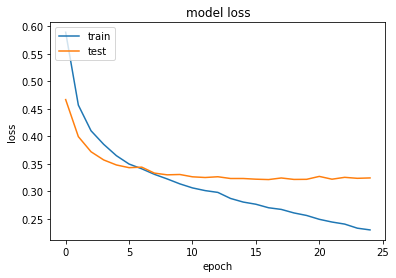

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Paso 6. Evaluamos el modelo

¿Crees poder llegar a más de 80%? ¿Qué tal arriba de 85%?

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.8627200126647949


# SOLUCIONES

No las veas antes de intentar tú primero

Ya intentaste tú primero?

# Intenta primero

In [ ]:
## TODO: Construye un modelo secuencial
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

## TODO: Compila el modelo con un optimizador y una función de pérdida
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## TODO: Corre el modelo. Experimenta con diferentes tamaños de batch y número de epochs. 
# Usa verbose=2 para ver cómo va progresando el modelo
model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test), 
          verbose=2)